In [1]:
import xml.etree.ElementTree as ET
import cv2
import numpy as np
from math import exp
import matplotlib.pyplot as plt

讀ＸＭＬ

In [2]:
img = cv2.imread('0093.jpg')

In [3]:
tree = ET.parse('0093.xml')
root = tree.getroot()
bboxes = []

for obj in root.iter('object'):
    bndbox=obj.find('bndbox')
    xmin=int(bndbox.find('xmin').text)
    ymin=int(bndbox.find('ymin').text)
    xmax=int(bndbox.find('xmax').text)
    ymax=int(bndbox.find('ymax').text)
    bboxes.append([xmin,ymin,xmax,ymax])
    imged = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 0, 255), 2)

In [ ]:
plt.subplot()
plt.imshow(imged)
cv2.imwrite('imged.jpg',imged)

True

生成Heatmap

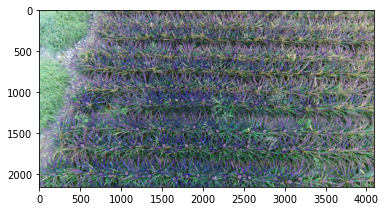

In [31]:
imgo = cv2.imread('0093.jpg')
plt.imshow(imgo)
h,w = imgo.shape[:2]

In [47]:
scaledGaussian = lambda x : exp(-(1/2)*(x**2))
isotropicGaussianHeatmapImage = np.zeros((h,w,3),np.uint8)
#isotropicGaussianHeatmapImage = cv2.applyColorMap(isotropicGaussianHeatmapImage,cv2.COLORMAP_JET)
for bndbox in bboxes:
    bndbox_h=bndbox[3]-bndbox[1]
    bndbox_w=bndbox[2]-bndbox[0]
    scale_heatmap = np.zeros((bndbox_h,bndbox_w),np.uint8)
    for i in range(bndbox_h):
        for j in range(bndbox_w):
            distanceFromCenter = np.linalg.norm(np.array([i-bndbox_h/2,j-bndbox_w/2]))
            distanceFromCenter = 4.5*distanceFromCenter/(bndbox_w/2)
            scaledGaussianProb = scaledGaussian(distanceFromCenter)
            scale_heatmap[i,j]=np.clip(scaledGaussianProb*255,0,255)
    isotropicGaussianHeatmapImage[bndbox[1]:bndbox[3],bndbox[0]:bndbox[2]] =cv2.applyColorMap(scale_heatmap, cv2.COLORMAP_JET)#將每個中間的熱點拼回原圖

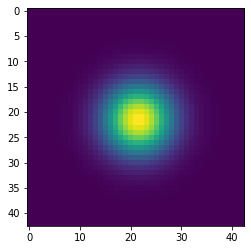

In [48]:
plt.imshow(scale_heatmap)

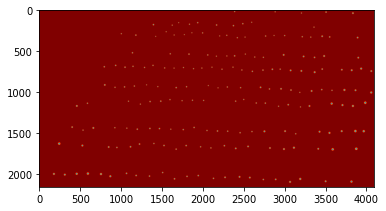

In [49]:
plt.imshow(isotropicGaussianHeatmapImage)
cv2.imwrite('heatmap.png',isotropicGaussianHeatmapImage)